In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
df=pd.read_csv('pokemon.csv')

In [3]:
df

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.392940,24.950000,0,43.800000,0,2,683,...,4.1.1(122573.16),16,1,20,5,3,5,3,4,3
1,428,46,360,402.646640,30.066667,0,44.200000,0,2,690,...,4.4.2(I9195XXUCNK1),19,1,25,5,4,5,5,5,5
2,406,44,360,735.840700,24.200000,0,44.183333,0,2,840,...,4.1.2(I9300XXELL4),16,1,22,5,3,5,4,4,4
3,1256,133,240,529.488300,24.116667,9,43.850000,0,2,868,...,4.4.4(suv3Rw),19,1,31,5,4,5,5,5,5
4,244,22,360,736.000850,24.066667,0,43.850000,0,2,869,...,4.1.2(I9300XXELL4),16,0,26,5,5,5,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,881,113,360,37.281925,2.300000,1,4.216667,1,2,120628,...,4.4.4(suv3Rw),19,1,26,5,1,1,1,3,1
1539,908,117,360,43.191174,12.950000,24,19.016667,3,3,123318,...,4.4.4(suv3Rw),19,0,29,5,1,1,2,1,1
1540,1774,168,360,58.460570,4.250000,4,8.416667,1,4,123430,...,5.0(G900FXXU1BOC2),21,1,27,5,1,1,1,1,1
1541,67,3,360,47.591620,0.133333,1,19.600000,2,3,139610,...,4.1.1(122573.16),16,1,27,5,1,1,1,1,1


The dataset is about : Quality of experience Influence Factors to assess YouTube end user’s QoE in mobile environments

It has been used in order to predict the subjective Mean Opinion Scores(MOS) given by usersnthat a tester will give at the end of each video view.

The goal we are pursuing with our analysis is to assess YouTube end user’s QoE in mobile environments and trying to predict the MOS based on many other factors.

Data exploration :

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1543 non-null   int64  
 1   user_id             1543 non-null   int64  
 2   QoA_VLCresolution   1543 non-null   int64  
 3   QoA_VLCbitrate      1543 non-null   float64
 4   QoA_VLCframerate    1543 non-null   float64
 5   QoA_VLCdropped      1543 non-null   int64  
 6   QoA_VLCaudiorate    1543 non-null   float64
 7   QoA_VLCaudioloss    1543 non-null   int64  
 8   QoA_BUFFERINGcount  1543 non-null   int64  
 9   QoA_BUFFERINGtime   1543 non-null   int64  
 10  QoS_type            1543 non-null   int64  
 11  QoS_operator        1543 non-null   int64  
 12  QoD_model           1543 non-null   object 
 13  QoD_os-version      1543 non-null   object 
 14  QoD_api-level       1543 non-null   int64  
 15  QoU_sex             1543 non-null   int64  
 16  QoU_ag

In [5]:
df.dtypes

id                      int64
user_id                 int64
QoA_VLCresolution       int64
QoA_VLCbitrate        float64
QoA_VLCframerate      float64
QoA_VLCdropped          int64
QoA_VLCaudiorate      float64
QoA_VLCaudioloss        int64
QoA_BUFFERINGcount      int64
QoA_BUFFERINGtime       int64
QoS_type                int64
QoS_operator            int64
QoD_model              object
QoD_os-version         object
QoD_api-level           int64
QoU_sex                 int64
QoU_age                 int64
QoU_Ustedy              int64
QoF_begin               int64
QoF_shift               int64
QoF_audio               int64
QoF_video               int64
MOS                     int64
dtype: object

We can see that we have to columns with categorical data : 'QoD_os-version' and 'QoD_model'

We check for null values :

In [6]:
df.isnull().sum().sum()

0

We can see that there are no null values in our dataset

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1543.0,924.261180,525.492253,52.000000,472.500000,897.000000,1298.500000,2077.000000
user_id,1543.0,98.128321,50.668531,1.000000,53.000000,117.000000,135.000000,181.000000
QoA_VLCresolution,1543.0,354.566429,25.939930,16.000000,360.000000,360.000000,360.000000,360.000000
QoA_VLCbitrate,1543.0,520.522257,350.957926,0.003294,307.668850,474.000920,661.491925,3918.293500
QoA_VLCframerate,1543.0,25.001576,6.690082,0.000000,24.733333,25.316667,29.800000,31.316667
QoA_VLCdropped,1543.0,1.217758,5.618366,0.000000,0.000000,0.000000,1.000000,107.000000
QoA_VLCaudiorate,1543.0,40.379790,9.123582,0.000000,43.783333,44.150000,44.466667,46.000000
QoA_VLCaudioloss,1543.0,0.235256,1.133616,0.000000,0.000000,0.000000,0.000000,14.000000
QoA_BUFFERINGcount,1543.0,1.392093,0.895943,1.000000,1.000000,1.000000,2.000000,10.000000
QoA_BUFFERINGtime,1543.0,6164.184705,15032.225559,683.000000,2010.500000,2719.000000,4067.000000,329271.000000


In [8]:
df.head()

,id,user_id,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,...,QoD_os-version,QoD_api-level,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,590,71,360,528.39294,24.950000,0,43.800000,0,2,683,...,4.1.1(122573.16),16,1,20,5,3,5,3,4,3
1,428,46,360,402.64664,30.066667,0,44.200000,0,2,690,...,4.4.2(I9195XXUCNK1),19,1,25,5,4,5,5,5,5
2,406,44,360,735.84070,24.200000,0,44.183333,0,2,840,...,4.1.2(I9300XXELL4),16,1,22,5,3,5,4,4,4
3,1256,133,240,529.48830,24.116667,9,43.850000,0,2,868,...,4.4.4(suv3Rw),19,1,31,5,4,5,5,5,5
4,244,22,360,736.00085,24.066667,0,43.850000,0,2,869,...,4.1.2(I9300XXELL4),16,0,26,5,5,5,4,5,5


We can drop id and user_id columns because they won't be relevant in our study and they do not add any information about MOS.

In [9]:
df=df.drop(['id','user_id'],axis=1)

We have to deal now with categorical data, ie columns : 'QoD_model' and 'QoD_os-version'

In [10]:
df['QoD_os-version'].nunique()

18

We can see that there are 18 different categories in 'QoD_os-version'

In [11]:
df['QoD_os-version'].unique()

array(['4.1.1(122573.16)', '4.4.2(I9195XXUCNK1)', '4.1.2(I9300XXELL4)',
       '4.4.4(suv3Rw)', '4.4.2(G900FXXU1ANG2)', '4.0.4(20130118.175432)',
       '4.4.2(G900FXXU1ANJ1)', '4.4.2(I9195XXUCNK4)', '5.0.1(457188.4)',
       '5.0.1(1602158)', '4.3(I9300XXUGNB5)', '5.0(G900FXXU1BOC7)',
       '4.3(I9506XXUBML5)', '5.1.1(456c49d1b2)', '5.0(G900FXXU1BOC2)',
       '4.4.2(N9005XXUGNI4)', '5.1.1(478106bf5f)', '4.4.2(G900FXXU1ANG9)'],
      dtype=object)

We will now one hot encode the categories in 'QoD_os-version' :

In [12]:
dummies = pd.get_dummies(df['QoD_os-version'],drop_first=True)

In [13]:
df = pd.concat([df.drop('QoD_os-version',axis=1),dummies],axis=1)

In [14]:
df.columns

Index(['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate',
       'QoA_VLCdropped', 'QoA_VLCaudiorate', 'QoA_VLCaudioloss',
       'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime', 'QoS_type', 'QoS_operator',
       'QoD_model', 'QoD_api-level', 'QoU_sex', 'QoU_age', 'QoU_Ustedy',
       'QoF_begin', 'QoF_shift', 'QoF_audio', 'QoF_video', 'MOS',
       '4.1.1(122573.16)', '4.1.2(I9300XXELL4)', '4.3(I9300XXUGNB5)',
       '4.3(I9506XXUBML5)', '4.4.2(G900FXXU1ANG2)', '4.4.2(G900FXXU1ANG9)',
       '4.4.2(G900FXXU1ANJ1)', '4.4.2(I9195XXUCNK1)', '4.4.2(I9195XXUCNK4)',
       '4.4.2(N9005XXUGNI4)', '4.4.4(suv3Rw)', '5.0(G900FXXU1BOC2)',
       '5.0(G900FXXU1BOC7)', '5.0.1(1602158)', '5.0.1(457188.4)',
       '5.1.1(456c49d1b2)', '5.1.1(478106bf5f)'],
      dtype='object')

We have successfully created columns of our different categories in 'QoD_os-version'.

We now deal with the other categorical data :'QoD_model'

In [15]:
df['QoD_model'].nunique()

15

In [16]:
df['QoD_model'].unique()

array(['HTC One X+', 'GT-I9195', 'GT-I9300', 'D5803', 'SM-G900F',
       'ARCHOS 101G9', 'HTC One_M8', 'Nexus 4', 'SM-N9005', 'GT-I9191',
       'GT-I9192', 'D5802', 'GT-I9189', 'GT-I9194', 'GT-I9193'],
      dtype=object)

In [17]:
dummies = pd.get_dummies(df['QoD_model'],drop_first=True)

In [18]:
df = pd.concat([df.drop('QoD_model',axis=1),dummies],axis=1)

In [19]:
df

,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoS_type,QoS_operator,...,GT-I9192,GT-I9193,GT-I9194,GT-I9195,GT-I9300,HTC One X+,HTC One_M8,Nexus 4,SM-G900F,SM-N9005
0,360,528.392940,24.950000,0,43.800000,0,2,683,4,2,...,0,0,0,0,0,1,0,0,0,0
1,360,402.646640,30.066667,0,44.200000,0,2,690,5,4,...,0,0,0,1,0,0,0,0,0,0
2,360,735.840700,24.200000,0,44.183333,0,2,840,2,2,...,0,0,0,0,1,0,0,0,0,0
3,240,529.488300,24.116667,9,43.850000,0,2,868,2,2,...,0,0,0,0,0,0,0,0,0,0
4,360,736.000850,24.066667,0,43.850000,0,2,869,4,4,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,360,37.281925,2.300000,1,4.216667,1,2,120628,1,3,...,0,0,0,0,0,0,0,0,0,0
1539,360,43.191174,12.950000,24,19.016667,3,3,123318,1,3,...,0,0,0,0,0,0,0,0,0,0
1540,360,58.460570,4.250000,4,8.416667,1,4,123430,1,3,...,0,0,0,0,0,0,0,0,1,0
1541,360,47.591620,0.133333,1,19.600000,2,3,139610,2,1,...,0,0,0,0,0,1,0,0,0,0


We have now dealt with all the categorical data.

We check if we can change anything in our dataset :

In [20]:
df.columns

Index(['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate',
       'QoA_VLCdropped', 'QoA_VLCaudiorate', 'QoA_VLCaudioloss',
       'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime', 'QoS_type', 'QoS_operator',
       'QoD_api-level', 'QoU_sex', 'QoU_age', 'QoU_Ustedy', 'QoF_begin',
       'QoF_shift', 'QoF_audio', 'QoF_video', 'MOS', '4.1.1(122573.16)',
       '4.1.2(I9300XXELL4)', '4.3(I9300XXUGNB5)', '4.3(I9506XXUBML5)',
       '4.4.2(G900FXXU1ANG2)', '4.4.2(G900FXXU1ANG9)', '4.4.2(G900FXXU1ANJ1)',
       '4.4.2(I9195XXUCNK1)', '4.4.2(I9195XXUCNK4)', '4.4.2(N9005XXUGNI4)',
       '4.4.4(suv3Rw)', '5.0(G900FXXU1BOC2)', '5.0(G900FXXU1BOC7)',
       '5.0.1(1602158)', '5.0.1(457188.4)', '5.1.1(456c49d1b2)',
       '5.1.1(478106bf5f)', 'D5802', 'D5803', 'GT-I9189', 'GT-I9191',
       'GT-I9192', 'GT-I9193', 'GT-I9194', 'GT-I9195', 'GT-I9300',
       'HTC One X+', 'HTC One_M8', 'Nexus 4', 'SM-G900F', 'SM-N9005'],
      dtype='object')

In [21]:
df['QoS_type'].unique()

array([4, 5, 2, 3, 1], dtype=int64)

In [22]:
df['QoS_operator'].unique()

array([2, 4, 1, 3], dtype=int64)

In [23]:
df['QoU_Ustedy'].unique()

array([5, 4, 2, 3], dtype=int64)

'QoS_type' is categorical data label encoded, so it implies order. We need to fix it to remove this implication and turn it into onehotencoding.

1 : EDGE

2 : UMTS

3 : HSPA

4 : HSPAP

5 : LTE

'QoS_operator' is categorical data label encoded, so it implies order. We need to fix it to remove this implication and turn it into onehotencoding.

• 1 : SFR

• 2 : BOUYEGUES

• 3 : ORANGE

• 4 : FREE

Same for 'QoU_Ustedy':



 5 -> University

• 4 -> Secondary school

• 3 -> College

• 2 -> Premary school

• 1 -> Other

We will use dictionnaries to map the values to the category :

In [24]:
dict_QoS_type = {1 : 'EDGE' , 2 : 'UMTS', 3 : 'HSPA', 4 : 'HSPAP', 5 : 'LTE'}
dict_QoS_operator= {1 : 'SFR', 2 : 'BOUYEGUES', 3 : 'ORANGE', 4 : 'FREE'}
dict_QoU_Ustedy = {5 : 'University',4 :'Secondary school', 3 : 'College', 2 :'Premary school', 1 : 'Other'}

In [25]:
df['QoS_type'] = df['QoS_type'].map(dict_QoS_type)
df['QoS_operator'] = df['QoS_operator'].map(dict_QoS_operator)
df['QoU_Ustedy']=df['QoU_Ustedy'].map(dict_QoU_Ustedy)

Now we transform our categorical rows into columns :

In [26]:
dummies = pd.get_dummies(df['QoS_type'],drop_first=True)
df = pd.concat([df.drop('QoS_type',axis=1),dummies],axis=1)

In [27]:
dummies = pd.get_dummies(df['QoS_operator'],drop_first=True)
df = pd.concat([df.drop('QoS_operator',axis=1),dummies],axis=1)

In [28]:
dummies = pd.get_dummies(df['QoU_Ustedy'],drop_first=True)
df = pd.concat([df.drop('QoU_Ustedy',axis=1),dummies],axis=1)

In [29]:
df.columns

Index(['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate',
       'QoA_VLCdropped', 'QoA_VLCaudiorate', 'QoA_VLCaudioloss',
       'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime', 'QoD_api-level', 'QoU_sex',
       'QoU_age', 'QoF_begin', 'QoF_shift', 'QoF_audio', 'QoF_video', 'MOS',
       '4.1.1(122573.16)', '4.1.2(I9300XXELL4)', '4.3(I9300XXUGNB5)',
       '4.3(I9506XXUBML5)', '4.4.2(G900FXXU1ANG2)', '4.4.2(G900FXXU1ANG9)',
       '4.4.2(G900FXXU1ANJ1)', '4.4.2(I9195XXUCNK1)', '4.4.2(I9195XXUCNK4)',
       '4.4.2(N9005XXUGNI4)', '4.4.4(suv3Rw)', '5.0(G900FXXU1BOC2)',
       '5.0(G900FXXU1BOC7)', '5.0.1(1602158)', '5.0.1(457188.4)',
       '5.1.1(456c49d1b2)', '5.1.1(478106bf5f)', 'D5802', 'D5803', 'GT-I9189',
       'GT-I9191', 'GT-I9192', 'GT-I9193', 'GT-I9194', 'GT-I9195', 'GT-I9300',
       'HTC One X+', 'HTC One_M8', 'Nexus 4', 'SM-G900F', 'SM-N9005', 'HSPA',
       'HSPAP', 'LTE', 'UMTS', 'FREE', 'ORANGE', 'SFR', 'Premary school',
       'Secondary school', 'University'],
    

In [30]:
df.head()

,QoA_VLCresolution,QoA_VLCbitrate,QoA_VLCframerate,QoA_VLCdropped,QoA_VLCaudiorate,QoA_VLCaudioloss,QoA_BUFFERINGcount,QoA_BUFFERINGtime,QoD_api-level,QoU_sex,...,HSPA,HSPAP,LTE,UMTS,FREE,ORANGE,SFR,Premary school,Secondary school,University
0,360,528.39294,24.950000,0,43.800000,0,2,683,16,1,...,0,1,0,0,0,0,0,0,0,1
1,360,402.64664,30.066667,0,44.200000,0,2,690,19,1,...,0,0,1,0,1,0,0,0,0,1
2,360,735.84070,24.200000,0,44.183333,0,2,840,16,1,...,0,0,0,1,0,0,0,0,0,1
3,240,529.48830,24.116667,9,43.850000,0,2,868,19,1,...,0,0,0,1,0,0,0,0,0,1
4,360,736.00085,24.066667,0,43.850000,0,2,869,16,0,...,0,1,0,0,1,0,0,0,0,1


We look for correlation between our different columns :

<AxesSubplot:>

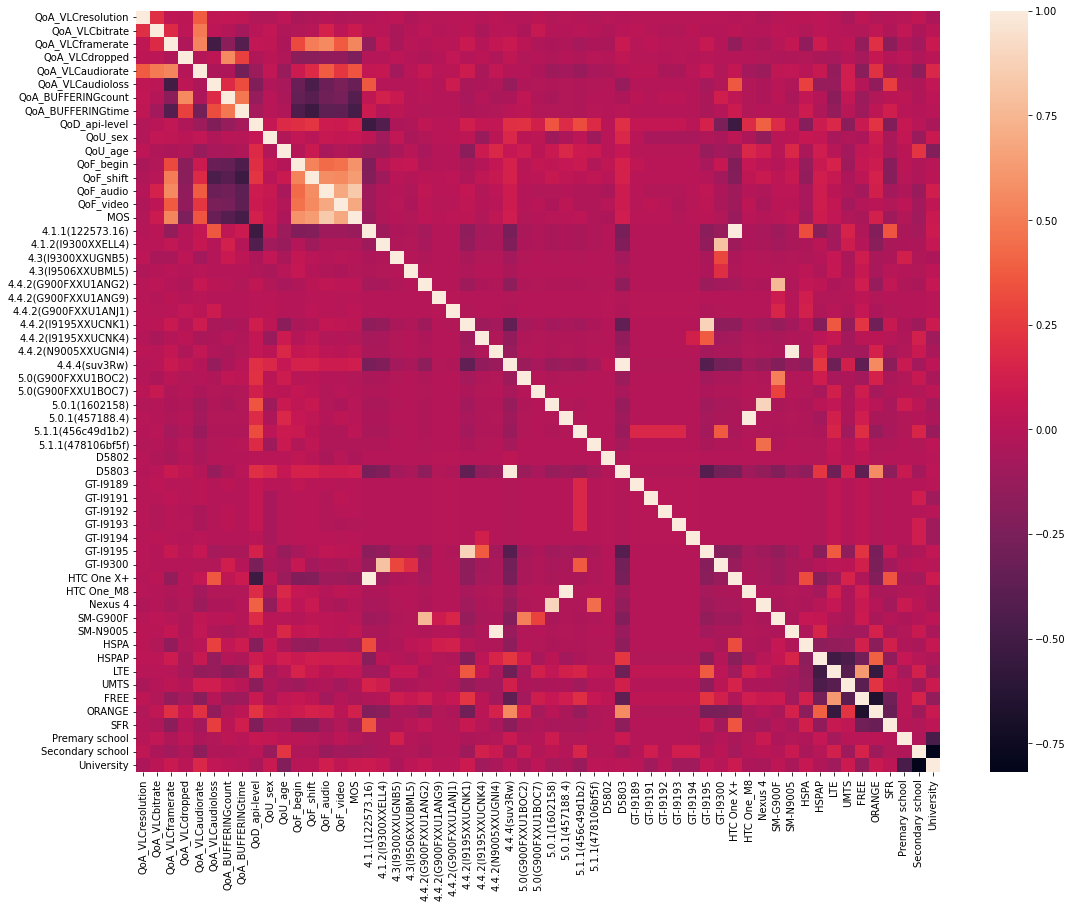

In [31]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr())

In [32]:
df.corr()['MOS'].sort_values(ascending=False)

MOS                     1.000000
QoF_audio               0.840735
QoF_video               0.689358
QoF_shift               0.634058
QoF_begin               0.591324
QoA_VLCframerate        0.544164
QoA_VLCaudiorate        0.353631
QoD_api-level           0.133560
ORANGE                  0.127363
D5803                   0.109564
4.4.4(suv3Rw)           0.107366
HSPAP                   0.098042
QoA_VLCbitrate          0.089671
University              0.082906
QoU_sex                 0.062251
LTE                     0.047529
4.4.2(N9005XXUGNI4)     0.040145
SM-N9005                0.040145
4.4.2(I9195XXUCNK1)     0.028262
4.4.2(G900FXXU1ANJ1)    0.026367
5.1.1(456c49d1b2)       0.023212
4.4.2(G900FXXU1ANG2)    0.020872
GT-I9195                0.017133
5.0.1(457188.4)         0.010611
HTC One_M8              0.010611
GT-I9189                0.007174
GT-I9194                0.007174
4.4.2(G900FXXU1ANG9)    0.007174
GT-I9192                0.007174
GT-I9191                0.007174
SM-G900F  

We can see that 'MOS' has a very high correlation with 'QoF_audio' 'QoF_video' and 'QoF_shift'

Now our dataset is ready to be used :

In [33]:
X=df.drop('MOS',axis=1).values
y=df['MOS'].values

We import libraries to split our data set into train and test set (train_test_split)

And MinMaxScaler to scale our data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

We split our data into training and test set:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

We set our scaler to fit on the training data.

Then we transform both our training and test data

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We import metrics to see how good our machine learning algorithms perform :

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

We can treat this data science problem either as regression or classification

I choose to solve it as a regression problem where we need to predict the MOS as a rating(float) between 1 and 5.

We import the libraries for the different algorithms :

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

We try first a linear regression :

In [39]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('the MSE is :', round(mean_squared_error(y_pred,y_test),3))
print('the R2 score is :',round(r2_score(y_pred,y_test),3))

the MSE is : 5.132578501038454e+20
the R2 score is : -0.003


It was expected that Linear regression would be a very bad model in our case.

We can see that the MSE is very big, so that confirms it.

Support Vector regression :

In [40]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('the MSE is :', round(mean_squared_error(y_pred,y_test),3))
print('the R2 score is :', round(r2_score(y_pred,y_test),3))

the MSE is : 0.19
the R2 score is : 0.794


We get a very good score by using support vector regression which is very impressive.

I was not expecting such good results with SVR.

this good result is due to the ability of SVR to take our data to a higher dimension. It is also considered a nonparametric technique because it relies on kernel functions.

DecisionTrees :

In [41]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('the MSE is :', round(mean_squared_error(y_pred,y_test),3))
print('the R2 score is :', round(r2_score(y_pred,y_test),3))

the MSE is : 0.355
the R2 score is : 0.67


We get a decent score with decision trees.

Even though we do not get a very very good score due to the overfitting of decisiontrees, and their sensitivity to new data, we still get a decent score compared to linear regression.

However SVR is still the best algorithm so far.

Random Forest Regressor :

In [42]:
regressor = RandomForestRegressor(n_estimators = 400, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('the MSE is :', round(mean_squared_error(y_pred,y_test),3))
print('the R2 score is :', round(r2_score(y_pred,y_test),3))

the MSE is : 0.183
the R2 score is : 0.807


We get a very very good result using RandomForest.

This was an expected result since random forest isn't sensitive to overfitting.

We can see that the best algorithm we can use with machine learning is : Random Forest Regression

We try to now use some deeplearning on our model. Deeplearning isn't expected to do very well on small datasets like this one.

But for experimentation, I will implement a simple ANN network on this dataset :

We import the libraries to build our model :

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

We create our model :

We use dropout layers to prevent us from overfitting.

In [46]:
model=Sequential()

model.add(Dense(56,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

We implement an early_stopping to prevent overfitting

In [47]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

We fit out model to our data :

In [48]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/100
37/37 [==============================] - 2s 13ms/step - loss: 6.5397 - val_loss: 0.7850
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 2.0676 - val_loss: 0.7009
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 1.6973 - val_loss: 0.5658
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 1.4137 - val_loss: 0.4362
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 1.2532 - val_loss: 0.4590
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 1.2644 - val_loss: 0.4659
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 1.1165 - val_loss: 0.3910
Epoch 8/100
37/37 [==============================] - 0s 4ms/step - loss: 1.0324 - val_loss: 0.3647
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - loss: 0.9914 - val_loss: 0.3923
Epoch 10/100
37/37 [==============================] - 0s 4ms/step - loss: 0.9874 - val_loss: 0.2884
Epoch 11

In [49]:
losses= pd.DataFrame(model.history.history)

<AxesSubplot:>

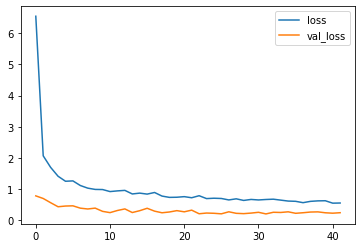

In [50]:
losses.plot()

In [51]:
y_pred=model.predict(X_test)
print('the MSE is :', round(mean_squared_error(y_pred,y_test),3))
print('the R2 score is :', round(r2_score(y_pred,y_test),3))

13/13 [==============================] - 0s 2ms/step
the MSE is : 0.245
the R2 score is : 0.679


We can see that our deep learning Model did decently.

However it is expected that random forest and SVR would do much better, because for deep learning to work, we need very large datasets.